In [1]:
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#Directorios
model_path = Path('/content/drive/MyDrive/Notebooks/ML/which_mario.keras')

# Cargar modelo
model = tf.keras.models.load_model(model_path)

In [23]:
def which_mario(_img):
  # Cargar imagen que viene
  img = tf.keras.utils.load_img(_img, target_size=(255, 255), color_mode="rgba")
  converted_img = tf.keras.utils.img_to_array(img) / 255.
  converted_img = np.expand_dims(converted_img, 0)

  # Predecir
  prediction = model.predict(converted_img, verbose=0)
  predicted_class = prediction[0][0]

  # Mientras más cercano a 0.5, más desconfiado es
  if predicted_class-0.5 < 0:
    # Clase 0 en binario
    certainty = float(np.max(np.absolute(predicted_class-0.5)/0.5)) # Sacar el porcentaje de confianza
    predicted_class = 'Super Mario Galaxy'
  else:
    # Clase 1 en binario
    certainty = float(np.max(np.absolute(predicted_class-0.5)/0.5))
    predicted_class = 'Super Mario Odyssey'
  return certainty, predicted_class, img

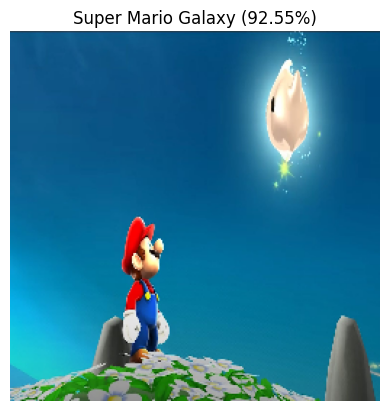

In [29]:
pred_cert, pred_class, img = which_mario('/content/679166b5-4cec-4eb0-8060-f89aa09f3451_1528x889.jpg')

plt.imshow(img)
plt.axis('off')
plt.title(f'{pred_class} ({pred_cert*100:.2f}%)')
plt.show()